In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandasql import sqldf
from scipy.stats import lognorm

pysqldf = lambda q: sqldf(q, globals())

In [47]:
folder = "../dataset/"
#basic_stats
names=['zipcode','date','category','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
basic_stats = pd.io.parsers.read_table(folder + 'basic_stats000',sep='\t', names=names, parse_dates=["date"])

#customer_zipcodes
names=['zipcode','date','category','zipcodecustomer','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
customer_zipcodes = pd.io.parsers.read_table(folder + 'customer_zipcodes000',sep='\t', names=names, parse_dates=["date"])

#age distribution
names=['zipcode','date','category','ageinterval','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
age_distribution = pd.io.parsers.read_table(folder + 'age_distribution000',sep='\t', names=names, parse_dates=["date"])

#gender distribution
names=['zipcode','date','category','gender','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
gender_distribution = pd.io.parsers.read_table(folder + 'gender_distribution000',sep='\t', names=names, parse_dates=["date"])

#payment_distribution 
names=['zipcode','date','category','paymentinterval','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
payment_distribution = pd.io.parsers.read_table(folder + 'payment_distribution000',sep='\t', names=names, parse_dates=["date"])

#demographic distribution
names=['zipcode','date','category','ageinterval','gender','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
demographic_distribution = pd.io.parsers.read_table(folder + 'demographic_distribution000',sep='\t', names=names, parse_dates=["date"])

#expenditure-time_curve
names=['zipcode','date','day_of_week','hour','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
expenditure_time_curve = pd.io.parsers.read_table(folder + 'expenditure-time_curve000',sep='\t', names=names, parse_dates=["date"])


basic_stats["amount"] = basic_stats["payment"]* basic_stats["avg"]
basic_stats["avgpaybymerch"] = basic_stats["payment"]/ basic_stats["merchant"]
basic_stats["amountbymerch"] = basic_stats["amount"]/ basic_stats["merchant"]
basic_stats["avgReppays"] = basic_stats["payment"] / basic_stats["card"]
basic_stats["weekday"] = basic_stats["date"].map(lambda d: (d.weekday()))
basic_stats["day"] = basic_stats["date"].map(lambda d: ('{0:%d}-{0:%a}'.format(d)))

customer_zipcodes["amount"] = customer_zipcodes["payment"]* customer_zipcodes["avg"]
customer_zipcodes["avgpaybymerch"] = customer_zipcodes["payment"]/ customer_zipcodes["merchant"]
customer_zipcodes["amountbymerch"] = customer_zipcodes["amount"]/ customer_zipcodes["merchant"]
customer_zipcodes["avgReppays"] = customer_zipcodes["payment"] / customer_zipcodes["card"]
customer_zipcodes["weekday"] = customer_zipcodes["date"].map(lambda d: (d.weekday()))
customer_zipcodes["day"] = customer_zipcodes["date"].map(lambda d: ('{0:%d}-{0:%a}'.format(d)))

age_distribution["amount"] = age_distribution["payment"]* age_distribution["avg"]
gender_distribution["amount"] = gender_distribution["payment"]* payment_distribution["avg"]
payment_distribution["amount"] = payment_distribution["payment"]* payment_distribution["avg"]
demographic_distribution["amount"] = demographic_distribution["payment"]* demographic_distribution["avg"]
expenditure_time_curve["amount"] = expenditure_time_curve["payment"]* expenditure_time_curve["avg"]

In [48]:
basic_stats[:3]

,zipcode,date,category,merchant,card,payment,avg,max,min,std,amount,avgpaybymerch,amountbymerch,avgReppays,weekday,day
0,8001,2014-07-01,es_barsandrestaurants,76,405,410,27.28,600.00,0.1,47.253606,11184.80,5.394737,147.168421,1.012346,1,01-Tue
1,8001,2014-07-01,es_contents,15,73,76,34.76,189.36,7.0,27.330793,2641.76,5.066667,176.117333,1.041096,1,01-Tue
2,8001,2014-07-01,es_fashion,56,304,313,32.21,199.00,3.0,25.875962,10081.73,5.589286,180.030893,1.029605,1,01-Tue


-1113.14548617 1.17745396924 2232.90328


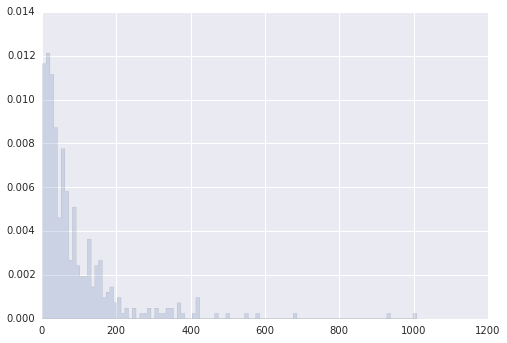

90.0566371927 1008.25616379 1.98201695016 116.267725767 36923.221249


In [51]:
#payment	avg	max	min	std	amount
#313	32.21	199.00	3.0	25.875962	10081.73	

avg=27.28
std=47.253606
numpayment=410

var=std*std
sigma2=np.log(1+(var/(avg*avg)))
sigma =np.sqrt(sigma2)
mu = np.log(avg)-(.5*var) 
print mu, sigma, var

fig, ax = plt.subplots(1, 1)
r = lognorm.rvs(sigma, loc=0,scale=std, size=numpayment)
ax.hist(r,  bins=100,normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()
print r.mean(),r.max(), r.min(), r.std(), r.sum()